In [8]:
import sqlalchemy as sal
from sqlalchemy import create_engine
import pyodbc
from numpy import random as nr
from pandastable import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

username = 'johnk'
pw = '89cr*(CR'
#db = 'SP_ManuLine'
db = 'dev'
port = 1433
server = '192.168.14.119'

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+db+';UID='+username+';PWD='+ pw)
cursor = cnxn.cursor()

cnxn.autocommit = True


In [9]:
cellname = "GraphTitle" #'A1910170005_cycling' #'A1910170004_Cycling'
#query = "select cellname, cycle_index, max(discharge_capacity) disCap from channelNormal where cellname = '" + cellname + "' group by cellname, cycle_index order by cellname, cycle_index"
query = "select cellname, cycle_index, max(charge_capacity) chargeCap, max(discharge_capacity) disCap, \
    (max(discharge_capacity)  / max(charge_capacity)) * 100 Coulombic \
    from channelNormal \
    group by cellname, cycle_index order by cellname, cycle_index" \

df = pd.read_sql_query(query, cnxn)

df.head(3)

cellname  cycle_index  chargeCap    disCap  Coulombic
0  A1910170004_Cycling            1   0.218605  0.218277  99.850230
1  A1910170004_Cycling            2   0.222466  0.219994  98.888687
2  A1910170004_Cycling            3   0.222210  0.220052  99.028871

['A1910170004_Cycling' 'A1910170005_cycling' 'A1910220002_Cycling'
 'A1911270001_Cycling_4p2_2p7V' 'A1911270007_cycling_4p3_2p7V']


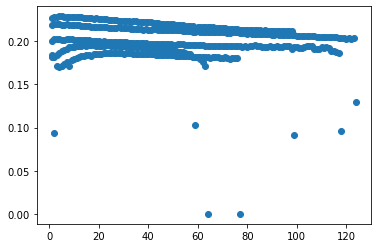

In [25]:
x = df['cycle_index']
y = df['disCap']
colors = df['cellname']
colors = colors.unique()
print(colors)
plt.scatter(x, y)#, title=cellname, color="cellname")
plt.show()

In [11]:
fig = px.scatter(df, x="cycle_index", y="Coulombic", title=cellname, color="cellname")
fig.show()

In [35]:
fig = px.line(df, x="cycle_index", y="disCap", title=cellname, color='cellname')
#fig = px.line(df, x="cycle_index", y="chargeCap", title=cellname, color='cellname')
fig.show()

In [12]:
fig = px.line(df, x="cycle_index", y="Coulombic", title=cellname, color="cellname")
fig.show()

In [16]:
fig = px.scatter(df, x="cycle_index", y="Coulombic", title=cellname, color="cellname")
fig.show()

In [15]:
fig = px.line(df, x="cycle_index", y="chargeCap", title=cellname, color="cellname")
fig.show()